# Beispiele

In [1]:
# Import
import matplotlib.pyplot as plt
import numpy as np

## Einfürhung in Machine Learning

### Beispiel: Linear Regression as Exemplary `sklearn` Process

Im Themenblock "Data Understanding: Pair-wise und Multivariate Explorations" haben wir schon ein einfaches Beispiel eines Supervised Learning Modells kennengelernt - die einfache lineare Regression. Wir gehen in diesem Beispiel nun den typischen Ablauf eines Machine Learning Prozesses in `sklearn` durch. Hierzu generieren wir uns folgende Daten.

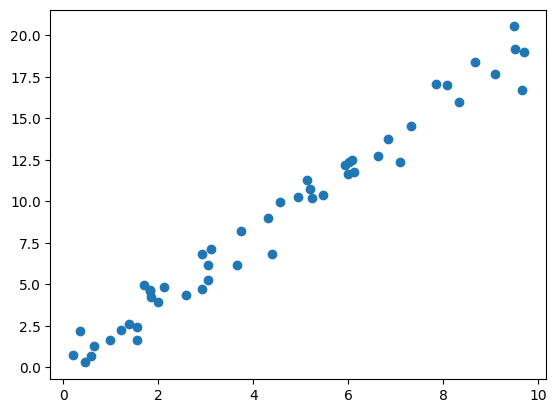

In [2]:
rng = np.random.RandomState(42)
X = 10 * rng.rand(50, 1)
y = 2 * X + rng.randn(50, 1)
plt.scatter(X, y);

In [3]:
# Choose class of model

# Choose Hyperparameters

# Fit the model to data

# Predict based on new data


#### Lösung

[[1.9776566]]
[0.09668927]


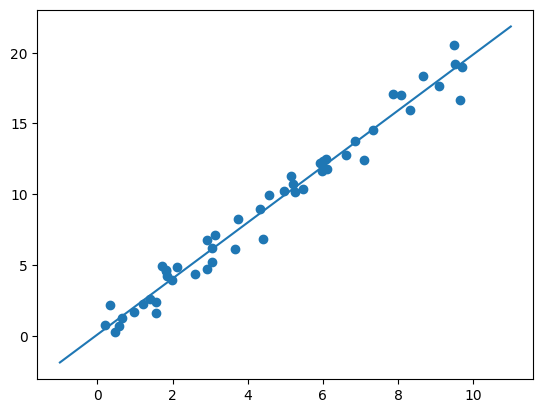

In [4]:
# Choose class of model
from sklearn.linear_model import LinearRegression

# Choose Hyperparameters
model = LinearRegression(fit_intercept=True)

# Fit the model to data
model.fit(X, y)
print(model.coef_)
print(model.intercept_) # Those parameters make sense, right?

# Predict based on new data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis] # Interesting - we usually solved this via .reshape(-1, 1)
yfit = model.predict(Xfit)
plt.scatter(X, y)
plt.plot(xfit, yfit);

### Beispiel: Polynomiale Regression
In diesem Beispiel schauen wir uns eine Polynomfunktion in Python näher an. Hierzu müssen wir auf die `PolynomialFeatures` und die `LinearRegression` Klassen zugreifen, die wir in `sklearn` finden. Schauen wir uns den Docstring der `PolynomialFeatures`
<div>
    <img src=attachment:458a207b-649f-4bd9-8819-5327b61bcaed.png width=500>
</div>

und der `LinearRegression`

<div>
    <img src=attachment:bb39a2b1-4454-45ca-8cd5-ed0b3012f87b.png width=500>
</div>

an. Was müssen wir wohl tun, um eine _polynomiale Regression_ durchzuführen?
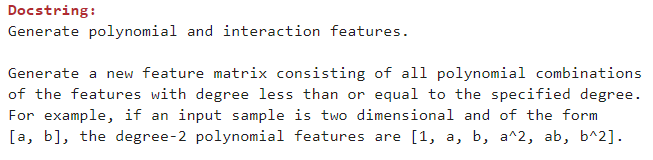
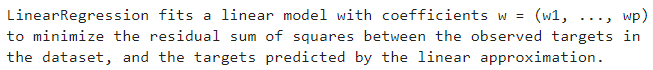

In [5]:
# Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some cubic data
def make_data(N=100, err=0.08):
    X = 2 * np.random.rand(N, 1) - 1
    y = X.ravel() ** 3
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [6]:
# Let's look at the polynomial features

# [1, x, x^2]


In [7]:
# Use them for linear regression fit

# Generate fit curve

# Plot


#### Lösung

In [8]:
# Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some cubic data
def make_data(N=100, err=0.08):
    X = 2 * np.random.rand(N, 1) - 1
    y = X.ravel() ** 3
    if err > 0:
        y += err * rng.randn(N)
    return X, y

# Data
X, y = make_data(40)

In [9]:
# Let's look at the polynomial features
poly_features = PolynomialFeatures(3).fit_transform(X)

# [1, x, x^2]
print(poly_features)

[[ 1.00000000e+00 -7.02259529e-01  4.93168446e-01 -3.46332240e-01]
 [ 1.00000000e+00 -6.03541850e-01  3.64262764e-01 -2.19847823e-01]
 [ 1.00000000e+00  2.67022771e-01  7.13011603e-02  1.90390334e-02]
 [ 1.00000000e+00  8.37632403e-01  7.01628043e-01  5.87706383e-01]
 [ 1.00000000e+00 -6.82843490e-01  4.66275232e-01 -3.18393007e-01]
 [ 1.00000000e+00 -3.85349430e-01  1.48494183e-01 -5.72221490e-02]
 [ 1.00000000e+00 -2.28392778e-01  5.21632611e-02 -1.19137121e-02]
 [ 1.00000000e+00  4.62738712e-02  2.14127116e-03  9.90849058e-05]
 [ 1.00000000e+00  1.67983205e-01  2.82183570e-02  4.74021004e-03]
 [ 1.00000000e+00  2.74247828e-01  7.52118712e-02  2.06266923e-02]
 [ 1.00000000e+00  9.62560789e-02  9.26523272e-03  8.91834971e-04]
 [ 1.00000000e+00 -5.11181479e-01  2.61306504e-01 -1.33575045e-01]
 [ 1.00000000e+00 -8.64890390e-01  7.48035387e-01 -6.46968618e-01]
 [ 1.00000000e+00 -8.39426778e-01  7.04637316e-01 -5.91491432e-01]
 [ 1.00000000e+00  1.51794848e-01  2.30416760e-02  3.49760771e

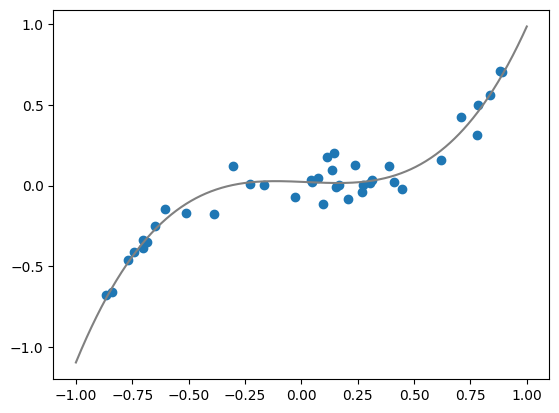

In [10]:
# Use them for linear regression fit
model = LinearRegression().fit(poly_features, y)

# Generate fit curve
X_fit = np.linspace(-1, 1, 1000)[:, None]
poly_features_fit = PolynomialFeatures(3).fit_transform(X_fit)
y_fit = model.predict(poly_features_fit)

# Plot
plt.scatter(X, y)
plt.plot(X_fit, y_fit, color='gray');

In [11]:
# The above: using pipeline
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

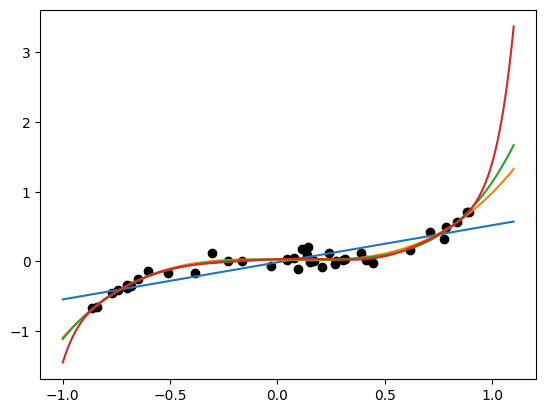

In [12]:
# Plot data again
plt.scatter(X.ravel(), y, color='black')

# Get data for curves
X_test = np.linspace(-1, 1.1, 500)[:, None]

# Plot several fits
axis = plt.axis()
for degree in [1, 3, 5, 9]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))